In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

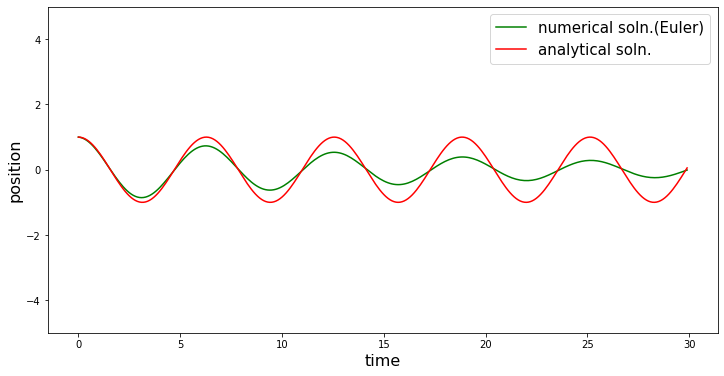

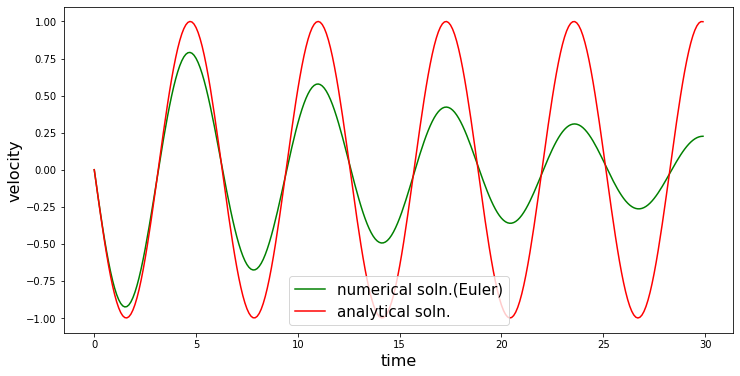

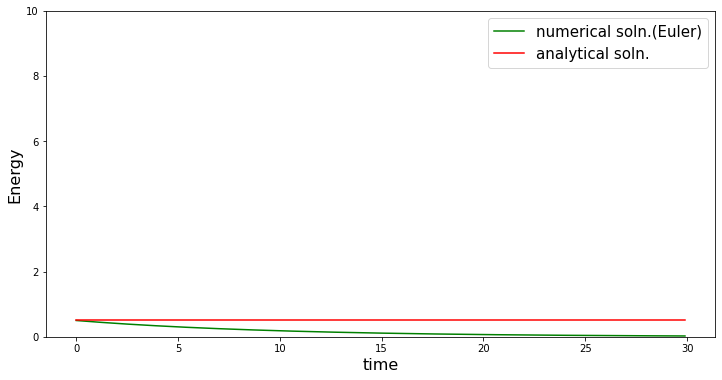

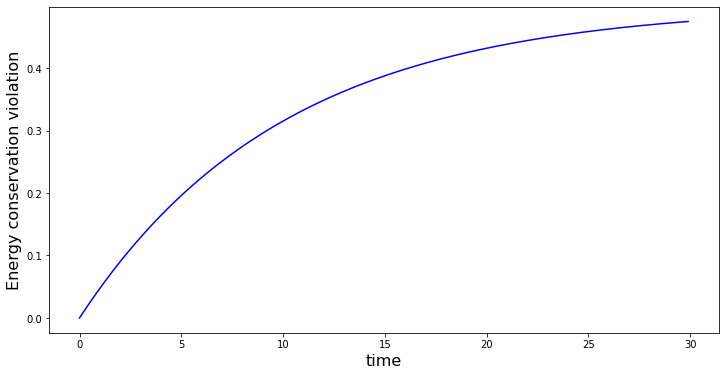

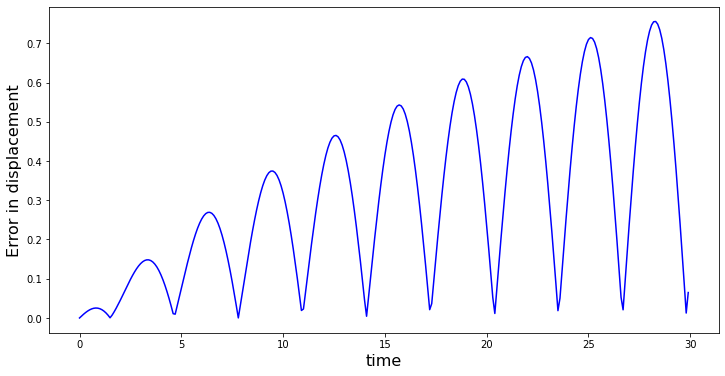

In [2]:
# Solving harmonic oscilator equation numerically using backward Euler's method

t = np.arange(0,30,0.1) # (initial time, final time + 1, time step size)
x = np.zeros(len(t))
v = np.zeros(len(t))
h = 0.1  # step size
x[0] = 1 # initial position x(t)=x(0)=1
v[0] = 0 # initial velocity
km = 1 # k/m ratio or w^2

for i in range (len(t)-1):
    x[i+1] = (1/(1+km*h**2))*(x[i] + h*v[i])
    v[i+1] = (1/(1+km*h**2))*(v[i] - h*km*x[i])

# Analytic solution: x = A*cos(w*t) + B*sin(w*t)
x_a = np.zeros(len(t))
# with inital conditions x(t)=x(0)=1 and v(t)=v(0)=0:
A = 1 
B = 0
w = 1 # angular velocity

# Calculating analytical solution for array of time - t:
x_a = A*np.cos(w*t) + B*np.sin(w*t)
v_a = -A*np.sin(w*t) + B*np.cos(w*t)
E_a = np.zeros(len(t))
E_a = 0.5*1*((x_a*x_a) + (v_a*v_a)) #Energy for analytical soln; mass m, spring constant k, =1
E = np.zeros(len(t))
E =  0.5*1*((x*x) + (v*v)) #Energy for numerical soln; mass m, spring constant k, =1

#plot numerical and analytical solutions - position/displacement:
plt.figure(figsize=(12,6))
plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("position",fontsize=16)
plt.plot(t,x,color ='green')
plt.plot(t,x_a,color ='red')
plt.legend(["numerical soln.(Euler)","analytical soln."],fontsize=15)
plt.show()

#plot numerical and analytical solutions - velocity:
plt.figure(figsize=(12,6))
#plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("velocity",fontsize=16)
plt.plot(t,v,color ='green')
plt.plot(t,v_a,color ='red')
plt.legend(["numerical soln.(Euler)","analytical soln."],fontsize=15)
plt.show()

#plot numerical and analytical solutions - Energy:
plt.figure(figsize=(12,6))
plt.ylim(0,10)
plt.xlabel("time",fontsize=16)
plt.ylabel("Energy",fontsize=16)
plt.plot(t,E,color ='green')
plt.plot(t,E_a,color ='red')
plt.legend(["numerical soln.(Euler)","analytical soln."],fontsize=15)
plt.show()

#Error calculation:

delX = np.sqrt((x - x_a)*(x - x_a))
delE = np.sqrt((E - E_a)*(E - E_a))
#plot delta Energy:
plt.figure(figsize=(12,6))
#plt.ylim(0,1)
plt.xlabel("time",fontsize=16)
plt.ylabel("Energy conservation violation",fontsize=16)
plt.plot(t,delE,color ='blue')
plt.show()

#plot delta displacement:
plt.figure(figsize=(12,6))
#plt.ylim(0,1)
plt.xlabel("time",fontsize=16)
plt.ylabel("Error in displacement",fontsize=16)
plt.plot(t,delX,color ='blue')
plt.show()